<a href="https://colab.research.google.com/github/LoSk-p/spo/blob/master/Blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install web3==4.2.1

Defaulting to user installation because normal site-packages is not writeable


In [35]:
from web3 import Web3 
#file = open('Nom.txt','r')
#Nom = file.read()
#file.close()
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/11d07501b90b450fb466e8f2492c0ccb"))
web3.eth.blockNumber

9794488

In [36]:
Reward=2 #награда за блок фиксированная ETH
N=8955400    #Начальный блок

Получение информации о транзакциях

In [ ]:
%%time
Blocks_gasUsed=[]
Blocks_Price=[]
Blocks_Contracts=[]
for i in range(100):
  GasUsed = []
  Price = []
  Contracts=[]
  for trans in web3.eth.getBlock(N+i)['transactions']:
    gettr=web3.eth.getTransaction(trans)
    gettrRes=web3.eth.getTransactionReceipt(trans)
    GasUsed.append(gettrRes['gasUsed'])
    Price.append(gettr['gasPrice'])
    if gettr['input'] != '0x':
      Contracts.append(1)
  Blocks_gasUsed.append(GasUsed)
  Blocks_Price.append(Price)
  Blocks_Contracts.append(Contracts)



Сохранение информации в файл, расчет награды за блок и процента комиссии майнеру

In [24]:
file = open('Blocks_info.txt', 'w')
Blocks_nom=[]
Blocks_com=[]
Blocks_otn=[]
Blocks_contr=[]
for i in range(100):
  Komm = 0
  Contr = len(Blocks_Contracts[i])
  for j in range(len(Blocks_Price[i])):
    Komm += Blocks_Price[i][j]*Blocks_gasUsed[i][j]/(10**18)
  Blocks_nom.append(i+N)
  Blocks_com.append(float("{0:.2f}".format(Komm)))
  Blocks_otn.append(float("{0:.1f}".format(Komm*100/(Komm+2))))
  Blocks_contr.append(Contr)
  file.write(str(i+N) + ',' + str(Komm) + ',' + str(Komm*100/(Komm+2)) + ',' + str(Contr) + '\n')  
file.close()

Чтение информации из файла

In [25]:
file = open('Blocks_info.txt', 'r')
inf=file.read().splitlines()
file.close()
Blocks_nom=[]
Blocks_com=[]
Blocks_otn=[]
Blocks_contr=[]
for block in inf:
  block=block.split(',')
  Blocks_nom.append(int(block[0]))
  Blocks_com.append(float(block[1]))
  Blocks_otn.append(float(block[2]))
  Blocks_contr.append(int(block[3]))

Расчет количества блоков с определенной комиссией и процентом

In [27]:
from collections import Counter
#Blocks_com.remove(122.46)
#Blocks_otn.remove(98.4)
Blocks_otn_counter = Counter(Blocks_otn)
Blocks_com_counter = Counter(Blocks_com)
Blocks_contr_counter = Counter(Blocks_contr)

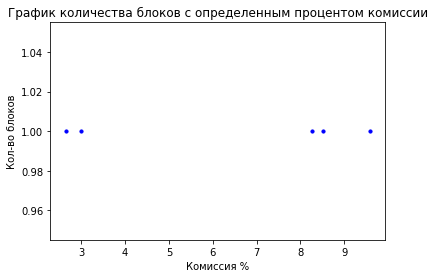

In [28]:
import matplotlib.pyplot as plt

plt.scatter(Blocks_otn_counter.keys(), Blocks_otn_counter.values(), color='blue', s=10)
plt.title('График количества блоков с определенным процентом комиссии')
plt.xlabel('Комиссия %')
plt.ylabel('Кол-во блоков')
plt.show()

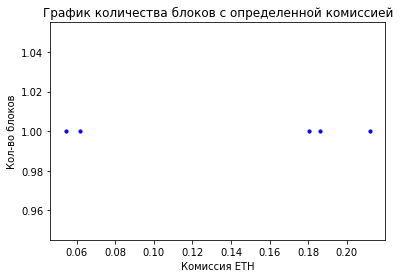

In [29]:
plt.scatter(Blocks_com_counter.keys(), Blocks_com_counter.values(), color='blue', s=10)
plt.title('График количества блоков с определенной комиссией')
plt.xlabel('Комиссия ETH')
plt.ylabel('Кол-во блоков')
plt.show()

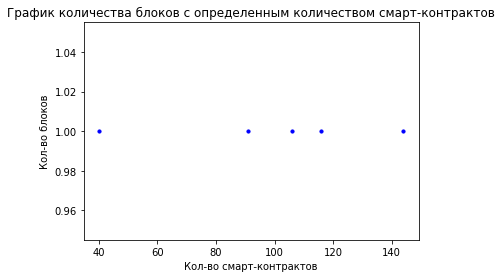

In [30]:
plt.scatter(Blocks_contr_counter.keys(), Blocks_contr_counter.values(), color='blue', s=10)
plt.title('График количества блоков с определенным количеством смарт-контрактов')
plt.xlabel('Кол-во смарт-контрактов')
plt.ylabel('Кол-во блоков')
plt.show()

Статистика

In [31]:
import statistics 
print('Абсолютное значение комиссии')
print('Медиана ' + str(statistics.median(Blocks_com)))
kom_range_razmah = max(Blocks_com) - min(Blocks_com) 
print('Размах ' + str(kom_range_razmah))
print('Среднее значение ' + "{0:.3f}".format(statistics.mean(Blocks_com)))
print('Дисперсия ' + "{0:.4f}".format(statistics.variance(Blocks_com)))
print('Отклонение ' + "{0:.3f}".format(statistics.stdev(Blocks_com)))

Абсолютное значение комиссии
Медиана 0.18028108649351593
Размах 0.15778434357032298
Среднее значение 0.139
Дисперсия 0.0056
Отклонение 0.075


In [32]:
print('Относительное значение комиссии')
print('Медиана ' + str(statistics.median(Blocks_otn)))
kom_range_razmah = max(Blocks_otn) - min(Blocks_otn) 
print('Размах ' + str(kom_range_razmah))
print('Среднее значение ' + "{0:.1f}".format(statistics.mean(Blocks_otn)))
print('Дисперсия ' + "{0:.1f}".format(statistics.variance(Blocks_otn)))
print('Отклонение ' + "{0:.1f}".format(statistics.stdev(Blocks_otn)))

Относительное значение комиссии
Медиана 8.268708452792062
Размах 6.944263659608931
Среднее значение 6.4
Дисперсия 11.0
Отклонение 3.3


In [33]:
print('Количество смарт-контрактов')
print('Медиана ' + str(statistics.median(Blocks_contr)))
kom_range_razmah = max(Blocks_contr) - min(Blocks_contr) 
print('Размах ' + str(kom_range_razmah))
print('Среднее значение ' + "{0:.1f}".format(statistics.mean(Blocks_contr)))
print('Дисперсия ' + "{0:.1f}".format(statistics.variance(Blocks_contr)))
print('Отклонение ' + "{0:.1f}".format(statistics.stdev(Blocks_contr)))

Количество смарт-контрактов
Медиана 106
Размах 104
Среднее значение 99.4
Дисперсия 1476.8
Отклонение 38.4
